# Prediction of Traffic Accident Risk
Team 7: 어서오십쇼HUMAN  
Editor: 김용현
## 1. Preprocess

In [1]:
# 사전 준비
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

plt.style.use('seaborn')
sns.set(font_scale=2.5)

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   


In [3]:
sample = pd.read_csv('../input/sample_accident.csv')

print("sample.shape:", sample.shape)

# 초기 샘플 데이터
sample

sample.shape: (362297, 10)


,발생일,발생시간,요일,발생지_시군구,사고내용,노면상태,기상상태,도로형태_대분류,가해자차종,가해자연령
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [4]:
#Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age

sample.rename(columns={"발생일":"Date", "발생시간":"Time", "요일":"Day", "발생지_시군구":"Location", "사고내용":"Target", "노면상태":"RoadState", "기상상태":"Weather", "도로형태_대분류":"RoadShape","가해자차종":"Type", "가해자연령":"Age"}, inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54세
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57세
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51세
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56세
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33세
...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34세
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56세
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57세
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59세


In [5]:
# Feature: 가해자연령

# 나이 불명인 열 삭제
sample = sample[sample['Age'] != '불명']

# 문자열 제거: ex 54'세' 제거
sample['Age'] = sample['Age'].str[:-1]

# dtype: object -> int
sample['Age'] = sample['Age'].astype('int')


In [6]:
# bins, labels
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10', '20', '30', '40', '50', '60', '70', '80']

# 나이대 분류
sample['AgeBand'] = pd.cut(sample['Age'], bins=bins, labels=labels)

# Drop NaN values
sample.dropna(how='any', inplace=True)

sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54,50
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57,50
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51,50
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56,50
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33,30
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [7]:
sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
0,20100101,00시,금,마포구,경상,젖음/습기,맑음,단일로,승용차,54,50
1,20100101,00시,금,동작구,중상,서리/결빙,맑음,단일로,승합차,57,50
2,20100101,00시,금,관악구,경상,서리/결빙,흐림,단일로,승용차,51,50
3,20100101,00시,금,강서구,경상,건조,맑음,교차로,승용차,56,50
4,20100101,00시,금,구로구,경상,건조,맑음,교차로,승용차,33,30
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,23시,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,23시,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,23시,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,23시,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [8]:
sample.dtypes

Date            int64
Time           object
Day            object
Location       object
Target         object
RoadState      object
Weather        object
RoadShape      object
Type           object
Age             int32
AgeBand      category
dtype: object

In [9]:
# Feature: Time

sample["Time"] = sample['Time'].str[:-1]

sample['Time'] = sample['Time'].astype('int')

bins = [0,6,12,18,23]
labels=['dawn','day','afternoon','night']

sample['Time'] = pd.cut(sample['Time'], bins=bins, labels=labels)

# Drop NaN values
sample.dropna(how='any', inplace=True)
sample

,Date,Time,Day,Location,Target,RoadState,Weather,RoadShape,Type,Age,AgeBand
9,20100101,dawn,금,종로구,경상,건조,맑음,단일로,승용차,34,30
10,20100101,dawn,금,서대문구,중상,건조,맑음,교차로,승용차,53,50
11,20100101,dawn,금,강북구,경상,젖음/습기,흐림,단일로,승용차,27,20
12,20100101,dawn,금,동대문구,경상,서리/결빙,흐림,단일로,승용차,50,40
13,20100101,dawn,금,마포구,경상,건조,맑음,단일로,승용차,50,40
...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,night,월,동작구,경상,건조,맑음,단일로,승용차,34,30
362293,20181231,night,월,강서구,부상신고,건조,맑음,교차로,승용차,56,50
362294,20181231,night,월,강동구,경상,건조,맑음,교차로,승용차,57,50
362295,20181231,night,월,강동구,경상,건조,맑음,단일로,승용차,59,50


In [10]:
# Feature: Location


North = ['은평구', '마포구', '서대문구', '종로구', '중구', '용산구']
South = ['서초구', '강남구', '송파구', '강동구']
East = ['성동구', '성북구', '광진구', '중랑구', '강북구', '도봉구', '동대문구', '노원구']
West = ['강서구', '양천구', '구로구', '영등포구', '동작구', '관악구', '금천구']


for label in North:
    sample['Location'] = np.where(sample['Location'] == label, 'North', sample['Location'])
    
for label in South:
    sample['Location'] = np.where(sample['Location'] == label, 'South', sample['Location'])    

for label in East:
    sample['Location'] = np.where(sample['Location'] == label, 'East', sample['Location'])
    
for label in West:
    sample['Location'] = np.where(sample['Location'] == label, 'West', sample['Location'])

    

locationData = pd.crosstab(sample.Location, sample.Target, margins=True)
locationData

Target,경상,부상신고,사망,중상,All
Location,,,,,
East,55700,6687,924,31466,94777
North,39388,5013,646,22316,67363
South,51063,5234,654,25518,82469
West,55811,5751,943,28337,90842
All,201962,22685,3167,107637,335451


In [11]:
# Feature: Target
TargetNameArr = ['Minor','Wound','Death','Heavy']

# 데이터명 수정
sample['Target'] = np.where(sample['Target'] == '경상', '0' ,sample['Target'])
sample['Target'] = np.where(sample['Target'] == '부상신고', '1',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '사망', '2',sample['Target'])
sample['Target'] = np.where(sample['Target'] == '중상', '3',sample['Target'])

sample['Target'] = sample['Target'].astype('int')
temp = sample['Target']

#
sample['TargetOrigin'] = temp

# One-hot encoding
sample = pd.get_dummies(sample, columns=['Target'], prefix=['Target'])



In [12]:
# 각 타입별 타겟 데이터
typeData = pd.crosstab(sample.Type, sample.TargetOrigin, margins=True)
weatherData = pd.crosstab(sample.Weather, sample.TargetOrigin, margins=True)
roadShapeDate = pd.crosstab(sample.RoadShape, sample.TargetOrigin, margins=True)
roadStateData = pd.crosstab(sample.RoadState, sample.TargetOrigin, margins=True)

In [13]:
# Feature: Type.all 500개 미만 type 제거
for data, index in zip(typeData.All, typeData.index):
    if data < 500:
        sample = sample[sample['Type'] != index]
        
# Feature: Weather, RoadShape, RoadState 결측값(불명) 제거
sample = sample[sample['Weather'] != '불명']

sample = sample[sample['RoadShape'] != '불명']



In [14]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
9,20100101,dawn,금,North,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
10,20100101,dawn,금,North,건조,맑음,교차로,승용차,53,50,3,0,0,0,1
11,20100101,dawn,금,East,젖음/습기,흐림,단일로,승용차,27,20,0,1,0,0,0
12,20100101,dawn,금,East,서리/결빙,흐림,단일로,승용차,50,40,0,1,0,0,0
13,20100101,dawn,금,North,건조,맑음,단일로,승용차,50,40,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,night,월,West,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,night,월,West,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,night,월,South,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,night,월,South,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [15]:
DayArray =['일','월','화','수','목','금','토']
print(DayArray[0])
for a in range(0,len(DayArray)):
    sample['Day'] = np.where(sample['Day'] == DayArray[a],a,sample['Day'])

일


In [16]:
sample.dtypes

Date               int64
Time            category
Day               object
Location          object
RoadState         object
Weather           object
RoadShape         object
Type              object
Age                int32
AgeBand         category
TargetOrigin       int32
Target_0           uint8
Target_1           uint8
Target_2           uint8
Target_3           uint8
dtype: object

In [17]:
sample[['AgeBand', 'TargetOrigin','Target_0','Target_1','Target_2','Target_3']].groupby(['AgeBand'], as_index=True).count()



,TargetOrigin,Target_0,Target_1,Target_2,Target_3
AgeBand,,,,,
10,14938,14938,14938,14938,14938
20,44638,44638,44638,44638,44638
30,58212,58212,58212,58212,58212
40,73308,73308,73308,73308,73308
50,85856,85856,85856,85856,85856
60,46609,46609,46609,46609,46609
70,10684,10684,10684,10684,10684
80,700,700,700,700,700


In [18]:
pd.crosstab(sample['AgeBand'], sample['TargetOrigin'], margins=True)

TargetOrigin,0,1,2,3,All
AgeBand,,,,,
10,7650,2637,137,4514,14938
20,26394,3633,474,14137,44638
30,34557,3758,497,19400,58212
40,44153,4205,622,24328,73308
50,53256,4690,790,27120,85856
60,28878,2700,479,14552,46609
70,6437,883,146,3218,10684
80,377,100,14,209,700
All,201702,22606,3159,107478,334945


In [19]:
temp = pd.get_dummies(sample.Location)
temp.columns[0]

'East'

In [20]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
9,20100101,dawn,5,North,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
10,20100101,dawn,5,North,건조,맑음,교차로,승용차,53,50,3,0,0,0,1
11,20100101,dawn,5,East,젖음/습기,흐림,단일로,승용차,27,20,0,1,0,0,0
12,20100101,dawn,5,East,서리/결빙,흐림,단일로,승용차,50,40,0,1,0,0,0
13,20100101,dawn,5,North,건조,맑음,단일로,승용차,50,40,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,night,1,West,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,night,1,West,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,night,1,South,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,night,1,South,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [21]:
# 각 feature들의 type
sample.dtypes

Date               int64
Time            category
Day               object
Location          object
RoadState         object
Weather           object
RoadShape         object
Type              object
Age                int32
AgeBand         category
TargetOrigin       int32
Target_0           uint8
Target_1           uint8
Target_2           uint8
Target_3           uint8
dtype: object

In [22]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
9,20100101,dawn,5,North,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
10,20100101,dawn,5,North,건조,맑음,교차로,승용차,53,50,3,0,0,0,1
11,20100101,dawn,5,East,젖음/습기,흐림,단일로,승용차,27,20,0,1,0,0,0
12,20100101,dawn,5,East,서리/결빙,흐림,단일로,승용차,50,40,0,1,0,0,0
13,20100101,dawn,5,North,건조,맑음,단일로,승용차,50,40,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,night,1,West,건조,맑음,단일로,승용차,34,30,0,1,0,0,0
362293,20181231,night,1,West,건조,맑음,교차로,승용차,56,50,1,0,1,0,0
362294,20181231,night,1,South,건조,맑음,교차로,승용차,57,50,0,1,0,0,0
362295,20181231,night,1,South,건조,맑음,단일로,승용차,59,50,0,1,0,0,0


In [23]:
pd.crosstab(sample['Type'], sample['TargetOrigin'], margins=True)

TargetOrigin,0,1,2,3,All
Type,,,,,
건설기계,883,57,99,634,1673
승용차,147296,10043,1518,71661,230518
승합차,14154,1231,403,9765,25553
원동기장치자전거,5385,2002,182,3319,10888
이륜차,12712,4789,372,8165,26038
자전거,6110,3341,130,3720,13301
특수차,305,28,22,224,579
화물차,14857,1115,433,9990,26395
All,201702,22606,3159,107478,334945


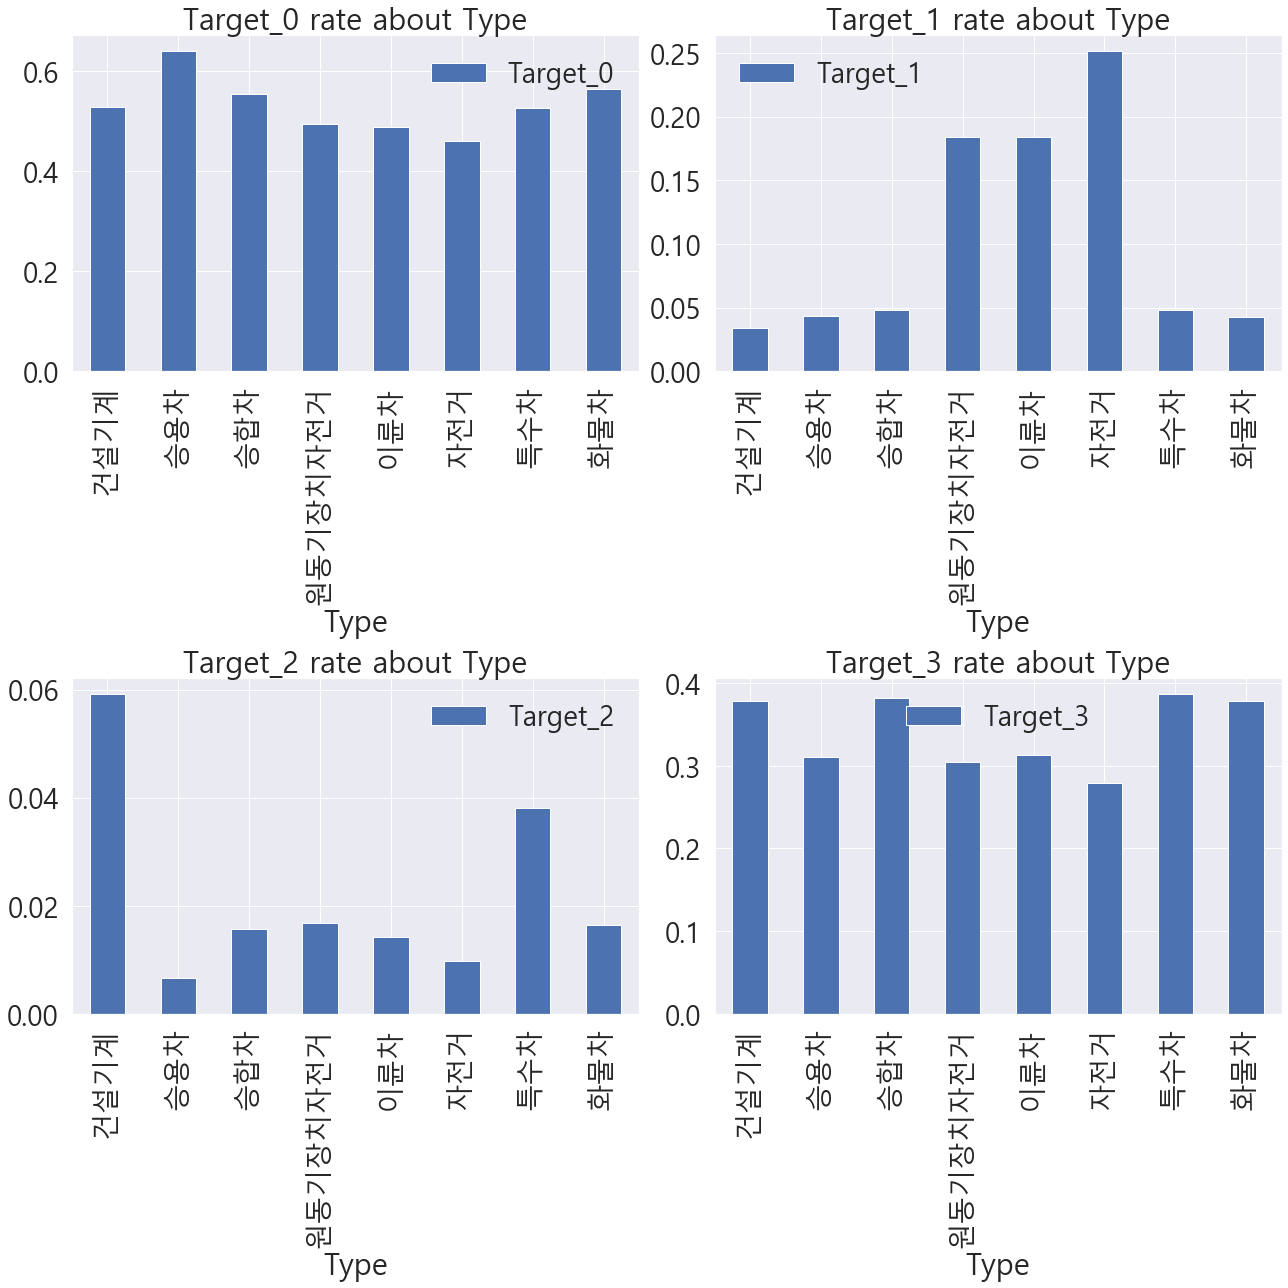

In [24]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))

sample[['Type', 'Target_0']].groupby(['Type'], as_index=True).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Target_0 rate about Type')

sample[['Type', 'Target_1']].groupby(['Type'], as_index=True).mean().plot.bar(ax=ax[0][1])
ax[0][1].set_title('Target_1 rate about Type')

sample[['Type', 'Target_2']].groupby(['Type'], as_index=True).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Target_2 rate about Type')

sample[['Type', 'Target_3']].groupby(['Type'], as_index=True).mean().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Target_3 rate about Type')

plt.tight_layout()
plt.show()

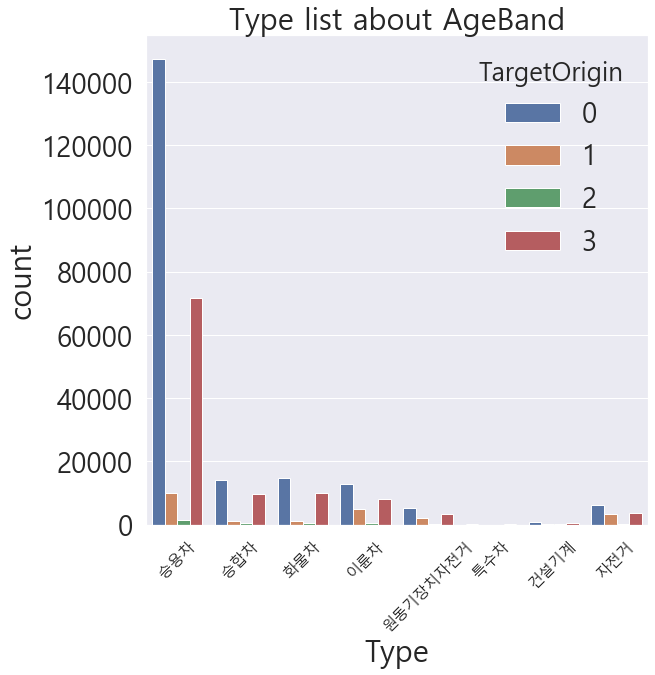

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.countplot('Type', hue='TargetOrigin', data=sample, ax=ax)
ax.set_title('Type list about AgeBand')
plt.xticks(fontsize =15,rotation =45)
plt.show()

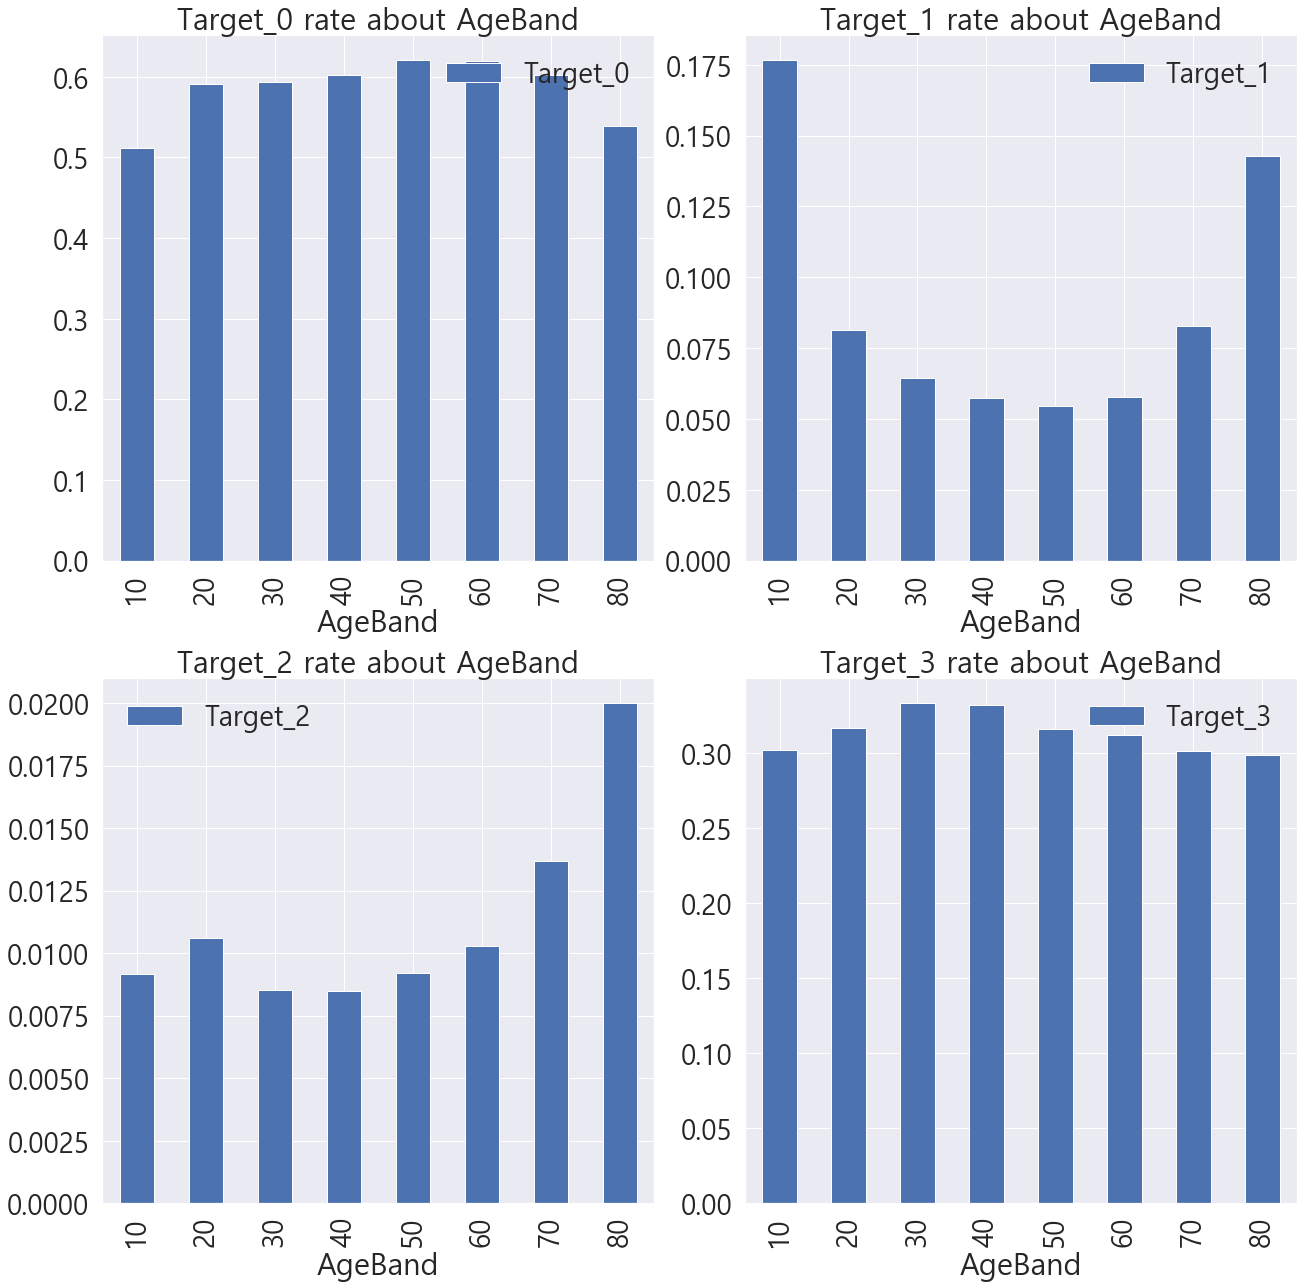

In [26]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))

sample[['AgeBand', 'Target_0']].groupby(['AgeBand'], as_index=True).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Target_0 rate about AgeBand')

sample[['AgeBand', 'Target_1']].groupby(['AgeBand'], as_index=True).mean().plot.bar(ax=ax[0][1])
ax[0][1].set_title('Target_1 rate about AgeBand')

sample[['AgeBand', 'Target_2']].groupby(['AgeBand'], as_index=True).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Target_2 rate about AgeBand')

sample[['AgeBand', 'Target_3']].groupby(['AgeBand'], as_index=True).mean().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Target_3 rate about AgeBand')

plt.tight_layout()
plt.show()

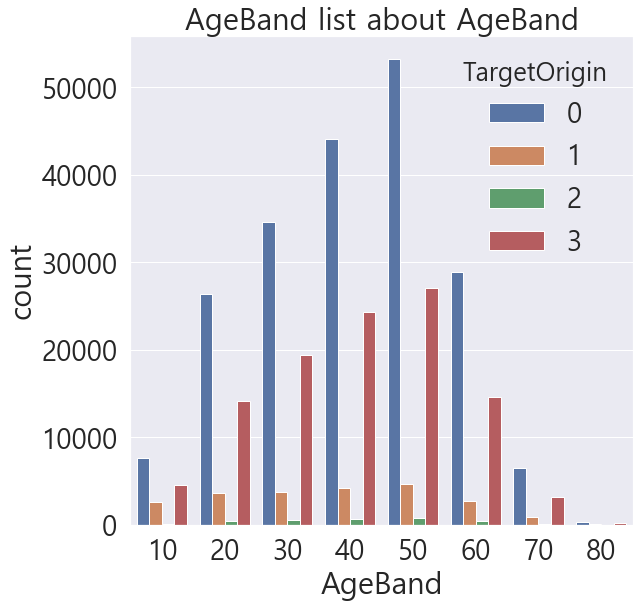

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.countplot('AgeBand', hue='TargetOrigin', data=sample, ax=ax)
ax.set_title('AgeBand list about AgeBand')

plt.show()

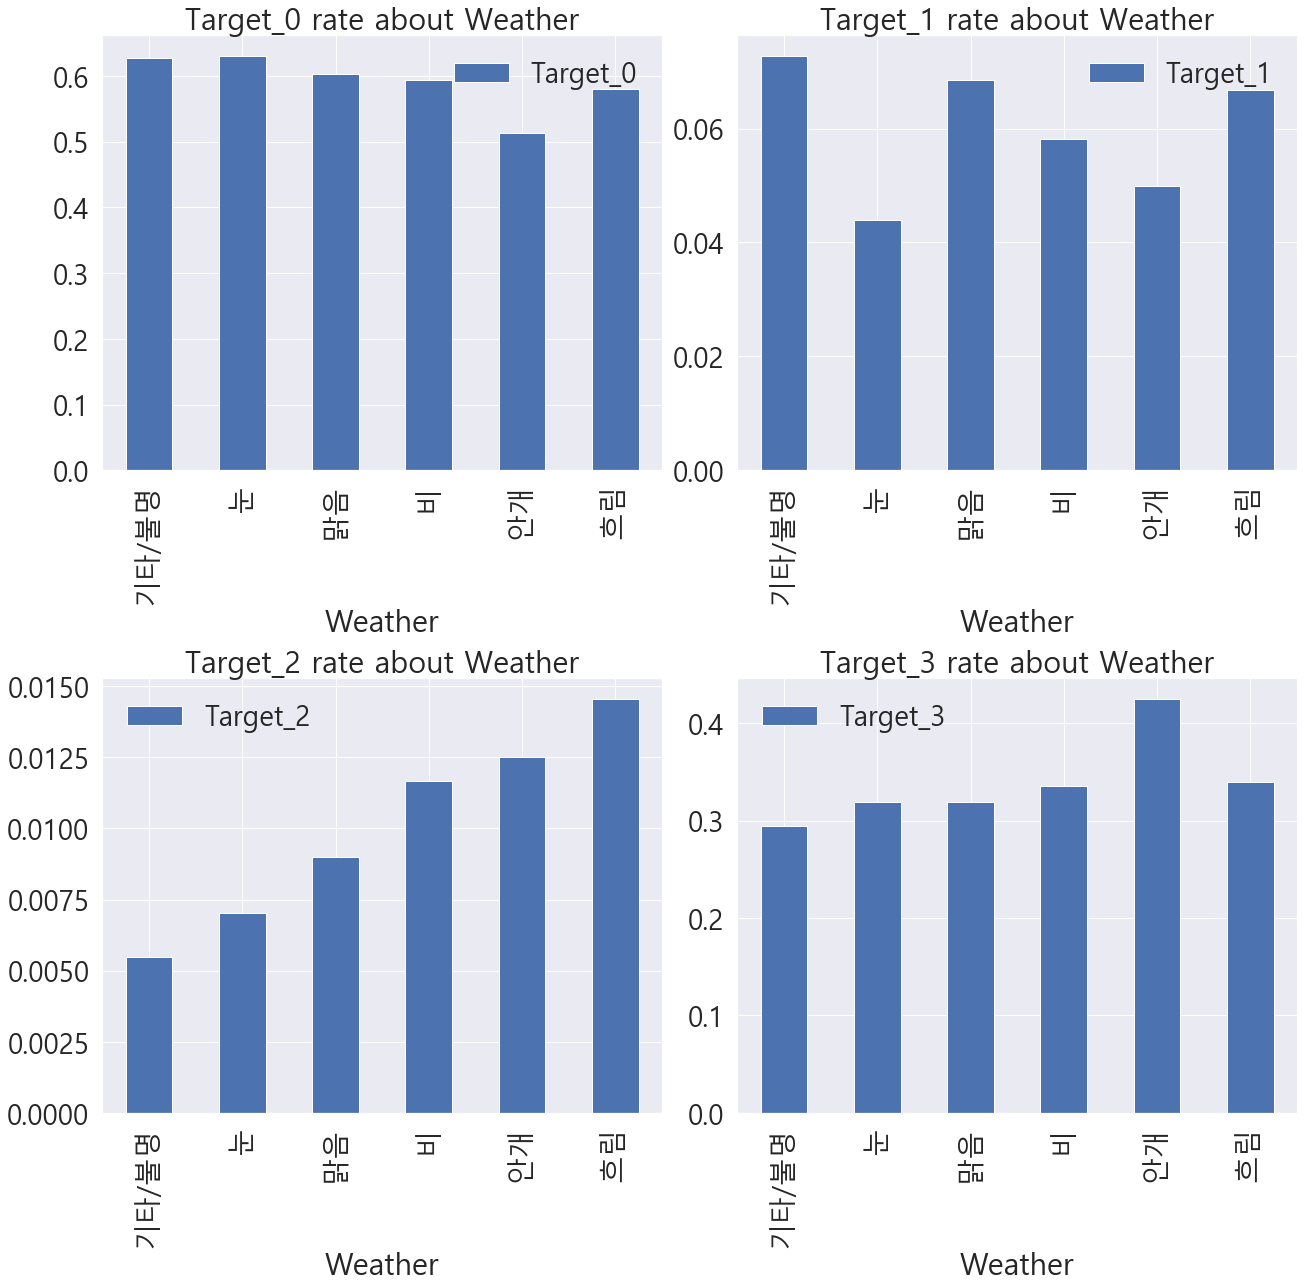

In [28]:
f, ax = plt.subplots(2, 2, figsize=(18, 18))

sample[['Weather', 'Target_0']].groupby(['Weather'], as_index=True).mean().plot.bar(ax=ax[0][0])
ax[0][0].set_title('Target_0 rate about Weather')

sample[['Weather', 'Target_1']].groupby(['Weather'], as_index=True).mean().plot.bar(ax=ax[0][1])
ax[0][1].set_title('Target_1 rate about Weather')

sample[['Weather', 'Target_2']].groupby(['Weather'], as_index=True).mean().plot.bar(ax=ax[1][0])
ax[1][0].set_title('Target_2 rate about Weather')

sample[['Weather', 'Target_3']].groupby(['Weather'], as_index=True).mean().plot.bar(ax=ax[1][1])
ax[1][1].set_title('Target_3 rate about Weather')

plt.tight_layout()
plt.show()

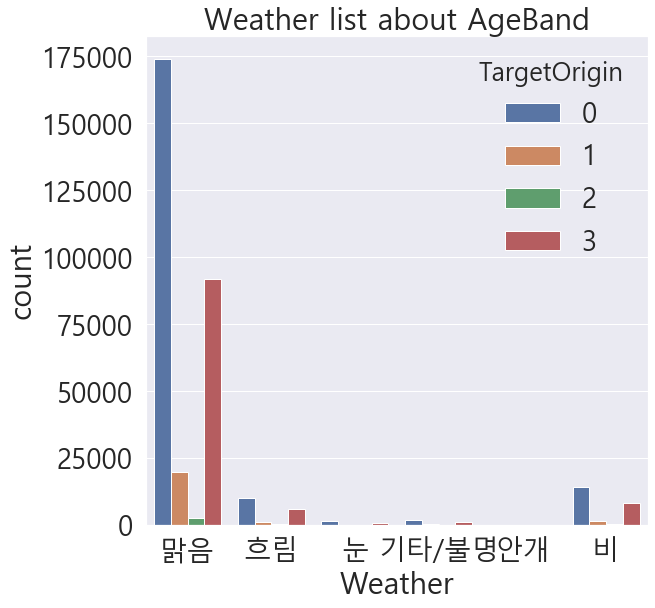

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
sns.countplot('Weather', hue='TargetOrigin', data=sample, ax=ax)
ax.set_title('Weather list about AgeBand')

plt.show()

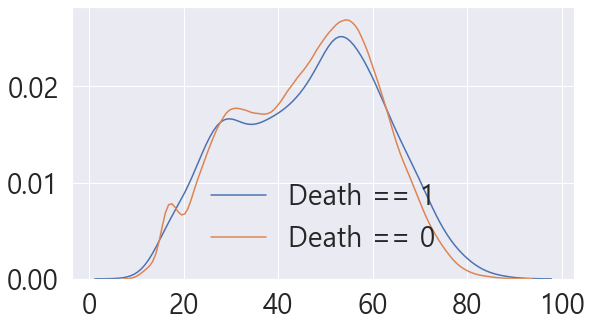

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(sample[sample['Target_2'] == 1]['Age'], ax=ax)
sns.kdeplot(sample[sample['Target_2'] == 0]['Age'], ax=ax)
plt.legend(['Death == 1', 'Death == 0'])
plt.show()

In [31]:
def preprocessing(feature):
    temp = pd.get_dummies(feature)
    temp = temp.columns
    print(temp)
    for a in range(0,len(temp)):
        feature = np.where(feature == temp[a],a,feature)
    return feature

In [32]:
# label 바꾸는 과정

sample.Location=preprocessing(sample.Location)
sample.Location
sample.RoadState = preprocessing(sample.RoadState)
sample.Weather = preprocessing(sample.Weather)
sample.RoadShape = preprocessing(sample.RoadShape)
sample.Type = preprocessing(sample.Type)
sample.Time = preprocessing(sample.Time)

Index(['East', 'North', 'South', 'West'], dtype='object')
Index(['건조', '기타', '서리/결빙', '적설', '젖음/습기', '침수', '해빙'], dtype='object')
Index(['기타/불명', '눈', '맑음', '비', '안개', '흐림'], dtype='object')
Index(['교차로', '기타', '기타/불명', '단일로'], dtype='object')
Index(['건설기계', '승용차', '승합차', '원동기장치자전거', '이륜차', '자전거', '특수차', '화물차'], dtype='object')
CategoricalIndex(['dawn', 'day', 'afternoon', 'night'], categories=['dawn', 'day', 'afternoon', 'night'], ordered=True, dtype='category')


In [33]:

sample['Location'] = sample['Location'].astype('int')

sample['Day'] = sample['Day'].astype('int')
sample['RoadState'] = sample['RoadState'].astype('int')
sample['Weather'] = sample['Weather'].astype('int')
sample['RoadShape'] = sample['RoadShape'].astype('int')
sample['Type'] = sample['Type'].astype('int')
sample['Time']=sample['Time'].astype('int')

## 2. Save preprocessing data

In [34]:
# 전처리 데이터 저장(input/preprocessing.csv)
sample.to_csv('../input/preprocessing.csv', encoding='utf-8-sig',index_label=False)

In [35]:
preprocessing = pd.read_csv('../input/preprocessing.csv')

print("sample.shape:", preprocessing.shape)

# 초기 샘플 데이터
preprocessing

sample.shape: (334945, 15)


,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
9,20100101,0,5,1,0,2,3,1,34,30,0,1,0,0,0
10,20100101,0,5,1,0,2,0,1,53,50,3,0,0,0,1
11,20100101,0,5,0,4,5,3,1,27,20,0,1,0,0,0
12,20100101,0,5,0,2,5,3,1,50,40,0,1,0,0,0
13,20100101,0,5,1,0,2,3,1,50,40,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,3,1,3,0,2,3,1,34,30,0,1,0,0,0
362293,20181231,3,1,3,0,2,0,1,56,50,1,0,1,0,0
362294,20181231,3,1,2,0,2,0,1,57,50,0,1,0,0,0
362295,20181231,3,1,2,0,2,3,1,59,50,0,1,0,0,0


## 3.EDA and Correlation Coefficient analysis

In [36]:
sample

,Date,Time,Day,Location,RoadState,Weather,RoadShape,Type,Age,AgeBand,TargetOrigin,Target_0,Target_1,Target_2,Target_3
9,20100101,0,5,1,0,2,3,1,34,30,0,1,0,0,0
10,20100101,0,5,1,0,2,0,1,53,50,3,0,0,0,1
11,20100101,0,5,0,4,5,3,1,27,20,0,1,0,0,0
12,20100101,0,5,0,2,5,3,1,50,40,0,1,0,0,0
13,20100101,0,5,1,0,2,3,1,50,40,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362292,20181231,3,1,3,0,2,3,1,34,30,0,1,0,0,0
362293,20181231,3,1,3,0,2,0,1,56,50,1,0,1,0,0
362294,20181231,3,1,2,0,2,0,1,57,50,0,1,0,0,0
362295,20181231,3,1,2,0,2,3,1,59,50,0,1,0,0,0


In [37]:
from sklearn.preprocessing import StandardScaler
sample2 = sample.drop(['Date','TargetOrigin','AgeBand','Target_0','Target_1','Target_2','Target_3'],axis = "columns")

tsample = sample2[sample['TargetOrigin']==0]
std_scaler = StandardScaler()
std_scaler.fit(tsample)
tsample = std_scaler.transform(tsample)   #normalize ,데이터 정규화 작업
tsample.shape

tsample2 = sample2[sample['TargetOrigin']==1]
std_scaler = StandardScaler()
std_scaler.fit(tsample2)
tsample2 = std_scaler.transform(tsample2)   #normalize ,데이터 정규화 작업
tsample2.shape

tsample3 = sample2[sample['TargetOrigin']==2]
std_scaler = StandardScaler()
std_scaler.fit(tsample3)
tsample3 = std_scaler.transform(tsample3)   #normalize ,데이터 정규화 작업
tsample3.shape

tsample4 = sample2[sample['TargetOrigin']==3]
std_scaler = StandardScaler()
std_scaler.fit(tsample4)
tsample4 = std_scaler.transform(tsample4)   #normalize ,데이터 정규화 작업
tsample4.shape

(107478, 8)

In [38]:
corr = np.corrcoef(np.transpose(tsample))
corr2 = np.corrcoef(np.transpose(tsample2))
corr3 = np.corrcoef(np.transpose(tsample3))
corr4 = np.corrcoef(np.transpose(tsample4))


In [39]:
corr

array([[ 1.00000000e+00, -1.52218097e-02, -3.40971873e-03,
        -2.53684619e-02, -1.65018016e-03,  2.68248765e-02,
         2.83035632e-02, -3.76088286e-02],
       [-1.52218097e-02,  1.00000000e+00,  1.32110263e-03,
        -2.04420548e-02, -9.74775135e-03,  1.49651941e-02,
         6.82420000e-04, -6.77676697e-03],
       [-3.40971873e-03,  1.32110263e-03,  1.00000000e+00,
         3.57499835e-03, -2.59261741e-02,  1.82068349e-02,
        -1.24264061e-02, -2.01314107e-02],
       [-2.53684619e-02, -2.04420548e-02,  3.57499835e-03,
         1.00000000e+00,  4.33679869e-01, -1.04491625e-02,
        -1.93396160e-02, -8.51722818e-03],
       [-1.65018016e-03, -9.74775135e-03, -2.59261741e-02,
         4.33679869e-01,  1.00000000e+00, -1.75256324e-02,
         1.83845349e-04, -4.43485260e-03],
       [ 2.68248765e-02,  1.49651941e-02,  1.82068349e-02,
        -1.04491625e-02, -1.75256324e-02,  1.00000000e+00,
        -9.13202368e-03, -8.07857380e-03],
       [ 2.83035632e-02,  6.824200

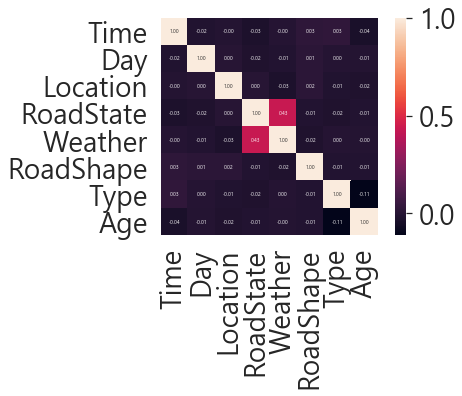

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
label = sample.columns[1:9]
heatmap2 = sns.heatmap(corr,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

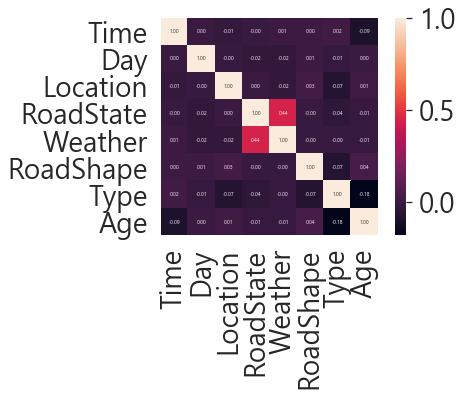

In [41]:

heatmap2 = sns.heatmap(corr2,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

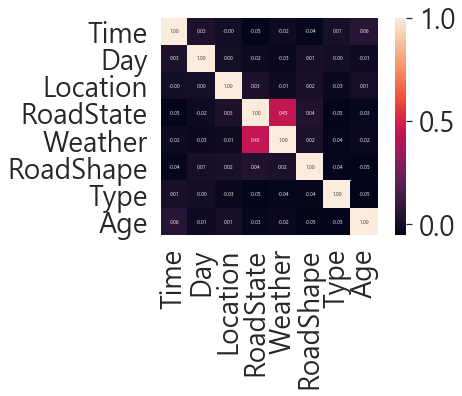

In [42]:

heatmap2 = sns.heatmap(corr3,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()

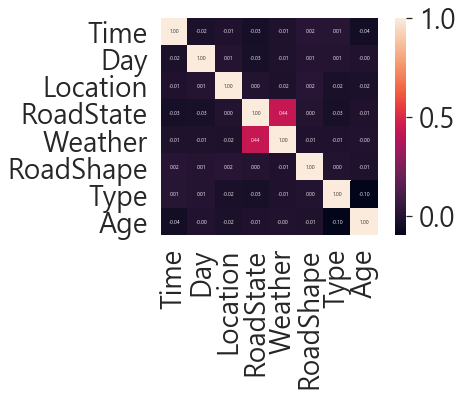

In [43]:
heatmap2 = sns.heatmap(corr4,cbar = True,annot = True,square = True,fmt = '.2f',annot_kws = {'size':5},
                      yticklabels = label,xticklabels = label)
plt.show()